In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from trackml.score import score_event
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [55]:


truth_file = 'event000002461-truth.csv'
hits_file = 'event000002461-hits.csv'

truths = pd.read_csv(truth_file)
truths = truths.rename(columns={'tx':'x', 'ty':'y', 'tz':'z'})
truth_short = pd.DataFrame(truths, columns=['hit_id', 'particle_id'])

hits = pd.read_csv(hits_file)
hits_short = pd.DataFrame(hits, columns=['hit_id', 'x', 'y', 'z'])

In [56]:
def preprocess(data):
    
    ### {Dataframe} -> {3d array}
    ###
    ### Takes in a dataframe of stored hit position values, performs a coordinate transformation
    ### on those coordinates, and then applies the standard scaler (zeroing mean and normalizing variance).
    ###

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values

    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(x**2 + y**2 + z**2)

    data['X'] = x / R
    data['Y'] = y / R
    data['Z'] = z / r

    transformed_coordinates = StandardScaler().fit_transform(np.column_stack((data['X'], data['Y'], data['Z'])))
    
    return transformed_coordinates

In [57]:
def predict(data):
    
    ### {Dataframe} -> {1d array}
    ###
    ### Takes in a dataframe of hit positions, transforms them via the preprocessing function, and \
    ### returns the labels predicted by the DBSCAN clustering algorithm.
    ###
    
    transformed_coords = preprocess(data)

    dbscan = DBSCAN(eps=0.008, min_samples=1, algorithm='auto')
    labels = dbscan.fit_predict(transformed_coords)
    
    return labels

In [58]:
def sample_evaluation(event_id, hits, labels):
    
    ### {number, dataframe, 1d array} -> {dataframe}
    ###
    ### Takes in event_id, hits dataframe, and labels from the predict function and returns
    ### an evaluated dataframe that lists the event_id, the hit_id, and the predicted label_id.
    ###
    
    submitted_info = np.column_stack(([event_id]*len(hits), hits.hit_id.values, labels))
    submission = pd.DataFrame(data=submitted_info, columns=["event_id", "hit_id", "track_id"])
    
    return submission

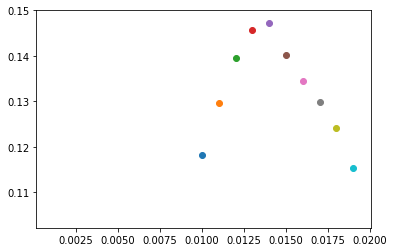

In [29]:
# This is for NON USE of standard scaler with a different epsilon (max fit at ~ 0.014)

fig = plt.figure()

for EPS in np.arange(0.01, 0.02, .001):
    EPS = EPS
    labels = predict(hits)
    submission = sample_evaluation(0, hits, labels)
    score = score_event(truths, submission)
    plt.scatter(EPS, score)

plt.show()

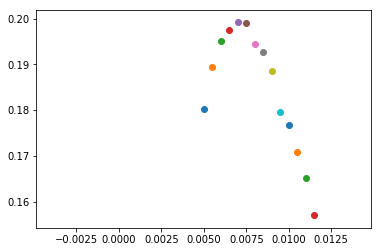

In [32]:
def preprocess(data):
    
    ### {Dataframe} -> {3d array}
    ###
    ### Takes in a dataframe of stored hit position values, performs a coordinate transformation
    ### on those coordinates, and then applies the standard scaler (zeroing mean and normalizing variance).
    ###

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values

    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(x**2 + y**2 + z**2)

    data['X'] = x / R
    data['Y'] = y / R
    data['Z'] = z / r

    transformed_coordinates = StandardScaler().fit_transform(data[['X', 'Y', 'Z']])
    
    return transformed_coordinates

for EPS in np.arange(0.005, 0.012, .0005):
    EPS = EPS
    labels = predict(hits)
    submission = sample_evaluation(0, hits, labels)
    score = score_event(truths, submission)
    plt.scatter(EPS, score)

plt.show()

In [59]:
labels = predict(hits)
submission = sample_evaluation(0, hits, labels)
score = score_event(truths, submission)
print(score)

0.19435186979572006


The normal, transformed variables, above, show a better fit for its optimum eplison param of ~ 0.008

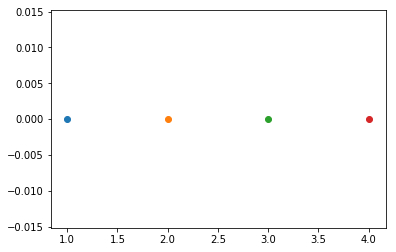

In [47]:
def preprocess(data):
    
    ### {Dataframe} -> {3d array}
    ###
    ### Takes in a dataframe of stored hit position values, performs a coordinate transformation
    ### on those coordinates, and then applies the standard scaler (zeroing mean and normalizing variance).
    ###

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values

    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(x**2 + y**2 + z**2)

    data['X'] = x / R
    data['Y'] = y / R
    data['Z'] = z / r

    transformed_coordinates = StandardScaler().fit_transform(data[['X', 'Y', 'Z']])
    
    return transformed_coordinates

def predict(data):
    
    ### {Dataframe} -> {1d array}
    ###
    ### Takes in a dataframe of hit positions, transforms them via the preprocessing function, and \
    ### returns the labels predicted by the DBSCAN clustering algorithm.
    ###
    
    transformed_coords = preprocess(data)

    dbscan = DBSCAN(eps=0.008, min_samples=MINIM, algorithm='auto')
    labels = dbscan.fit_predict(transformed_coords)
    
    return labels

for MINIM in np.arange(1, 5, 1):
    MINIM = MINIM
    labels = predict(hits)
    submission = sample_evaluation(0, hits, labels)
    score = score_event(truths, submission)
    plt.scatter(MINIM, score)

plt.show()

DBSCAN doesn't seem to have much dependence on the minimum # of points in this case (density must be well portioned off and adequately dense).

# Let's try out some added or different features below


In [46]:
def preprocess(data):
    
    ### {Dataframe} -> {3d array}
    ###
    ### Takes in a dataframe of stored hit position values, performs a coordinate transformation
    ### on those coordinates, and then applies the standard scaler (zeroing mean and normalizing variance).
    ###

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values

    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(x**2 + y**2 + z**2)

    data['X'] = x / R
    data['Y'] = y / R
    data['Z'] = z / r
    
    theta = np.arctan2(y,x)
    
    xtran = x / (r**2)
    ytran = y / (r**2)
    ztran = z / r
    
    modified = np.column_stack([np.cos(theta), np.sin(theta), ztran])
    
    return modified

def predict(data):
    
    ### {Dataframe} -> {1d array}
    ###
    ### Takes in a dataframe of hit positions, transforms them via the preprocessing function, and \
    ### returns the labels predicted by the DBSCAN clustering algorithm.
    ###
    
    transformed_coords = preprocess(data)
    dbscan = DBSCAN(eps=0.0338, min_samples=1, algorithm='auto')
    labels = dbscan.fit_predict(transformed_coords)
    
    return labels
    
labels = predict(hits)
submission = sample_evaluation(0, hits, labels)
score = score_event(truths, submission)
print(score)

0.0


In [261]:
weights = [0.7, 0.9, 1.5]

def preprocess(data):
    
    ### {Dataframe} -> {3d array}
    ###
    ### Takes in a dataframe of stored hit position values, performs a coordinate transformation
    ### on those coordinates, and then applies the standard scaler (zeroing mean and normalizing variance).
    ###

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values

    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(x**2 + y**2 + z**2)

    data['X'] = x / R
    data['Y'] = y / R
    data['Z'] = z / r
    
    theta = np.arctan2(y,x)
    
    xtran = x / (r**2)
    ytran = y / (r**2)
    ztran = z / r
    
    trans_coords = StandardScaler().fit_transform(data[['X', 'Y', 'Z']])
    weighted_coords = np.multiply(trans_coords, weights)
    
    return weighted_coords

In [392]:
x = hits.x.values
y = hits.y.values
z = hits.z.values
r = np.sqrt(x**2 + y**2)
R = np.sqrt(x**2 + y**2 + z**2)

hits['x2'] = x / R
hits['y2'] = y / R
hits['z2'] = z / r

hits['R'] = np.sqrt(hits['x'].values**2+hits['y'].values**2+hits['z'].values**2)
hits['r'] = np.sqrt(hits['x'].values**2+hits['y'].values**2)
hits['a0'] = np.arctan2(hits['y'].values,hits['x'].values
hits['z1'] = hits['z'].values/hits['r'].values
hits['x2'] = 1/hits['z1'].values

dz0 = -0.00070
stepdz = 0.00001
stepeps = 0.000005
mm = 1

    for i in range(100):
        mm = mm*(-1)
        dz = mm*(dz0 + i*stepdz)
        hits['a1'] = hits['a0'].values + dz*hits['z'].values * np.sign(feats['z'].values)
        hits['sina1'] = np.sin(hits['a1'].values)
        hits['cosa1'] = np.cos(hits['a1'].values)
        hits['x1'] = hits['a1'].values / hits['z1'].values)
        ss = StandardScaler()
        dfs = ss.fit_transform(hits[['sina1','cosa1','z1','x1','x2']].values)
        weigs = np.array([1, 1, 0.75, 0.5, 0.5])
        dfs = np.multiply(dfs, weigs)
    
        clusters = DBSCAN(eps=0.0035+i*stepeps, min_samples=1, metric='euclidean').fit(dfs).labels_
    if i == 0:
        hits['s1'] = clusters
        hits['N1'] = hits.groupby('s1')['s1'].transform('count')
    else:
        hits['s2'] = clusters
        hits['N2'] = hits.groupby('s2')['s2'].transform('count')
        maxs1 = hits['s1'].max()
        cond = np.where((hits['N2'].values>hits['N1'].values) & (hits['N2'].values<20))
        s1 = hits['s1'].values
        s1[cond] = hits['s2'].values[cond] + maxs1
        hits['s1'] = s1
        hits['s1'] = hits['s1'].astype('int64')
        hits['N1'] = hits.groupby('s1')['s1'].transform('count')
    
feats['s1'].values
submission = sample_evaluation(0, hits, labels)
score = score_event(truths, submission)
print(score);

SyntaxError: invalid syntax (<ipython-input-392-e5669ddf3807>, line 14)

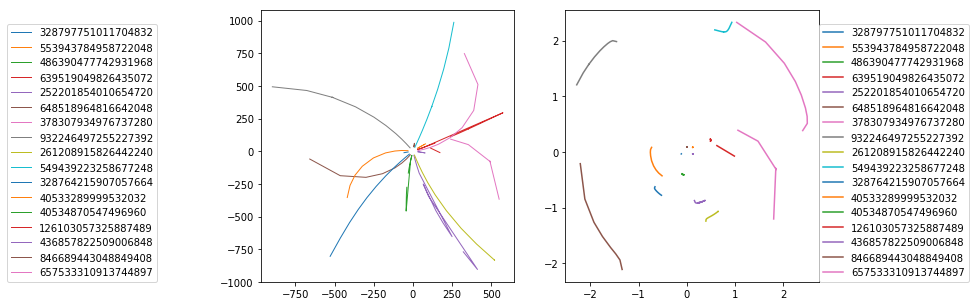

In [75]:
#truth_file = 'event000001910-truth.csv'
truths = pd.read_csv(truth_file)
truths = truths.rename(columns={'tx':'x', 'ty':'y', 'tz':'z'})


fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)

for track in tracks[1::600]:
    t = truths[truths.particle_id == track]
    ax1.plot(t.x, t.y, lw=1, label=track)
    ax1.legend(loc=(-1,0))
    
ax2 = fig.add_subplot(122)
    
for track in tracks[1::600]:
    t = preprocess(truths)[truths.particle_id == track]
    ax2.plot(t[:,0], t[:,1], label=track)
    ax2.legend(loc=(1,0))
    
plt.show()

In [74]:
len(tracks) / 600

16.95

In [131]:
hitids = []

for track in tracks[1::600]:
    hitids.append([track, truths[truths.particle_id == track].hit_id.values])
    

In [133]:
hitids[0]

[328797751011704832,
 array([    2,    49,  1511,  1564,  3364,  3424,  5520,  5589,  8027,
         8096, 10882], dtype=int64)]

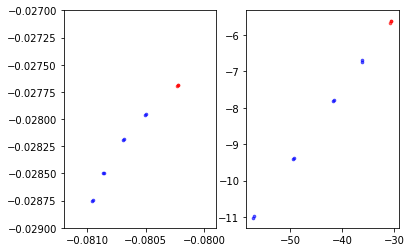

In [285]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

track = hitids[0][0]

t1 = preprocess(truths)[truths.hit_id.isin(hitids[0][1][0:8])]
t2 = preprocess(truths)[truths.hit_id.isin(hitids[0][1][8:11])]

ax1.scatter(t1[:,0], t1[:,1], s=7, c='b', alpha=.6)
ax1.scatter(t2[:,0], t2[:,1], s=7, c='r', alpha=.6)

ax1.set_xlim(-0.0812, -0.0799)
ax1.set_ylim(-0.029, -0.027)

ax2 = fig.add_subplot(122)

t1T = truths[truths.hit_id.isin(hitids[0][1][0:8])]
t2T = truths[truths.hit_id.isin(hitids[0][1][8:11])]

ax2.scatter(t1T.x, t1T.y, s=7, c='b', alpha=.6)
ax2.scatter(t2T.x, t2T.y, s=7, c='r', alpha=.6)

plt.show()

In [398]:
difference = []
perc_diff = []

for i in range(len(hitids)):
    p_id = truths[truths.hit_id.isin(hitids[i][1])].particle_id.unique()[0]
    hits_in_full = truths[truths.particle_id == p_id].hit_id.count()
    common_track = submission[submission.hit_id.isin(hitids[i][1])]['track_id'].value_counts().idxmax()
    hits_found = len(submission[submission.track_id == common_track])
    
    difference.append(hits_in_full - hits_found)
    perc_diff.append(round(np.abs((hits_in_full - hits_found))/hits_in_full, 2))
    
perc_diff

[0.27,
 0.0,
 0.38,
 0.43,
 0.85,
 0.88,
 0.27,
 0.77,
 0.67,
 0.86,
 0.86,
 0.78,
 1.0,
 0.5,
 0.94,
 0.91,
 0.8]

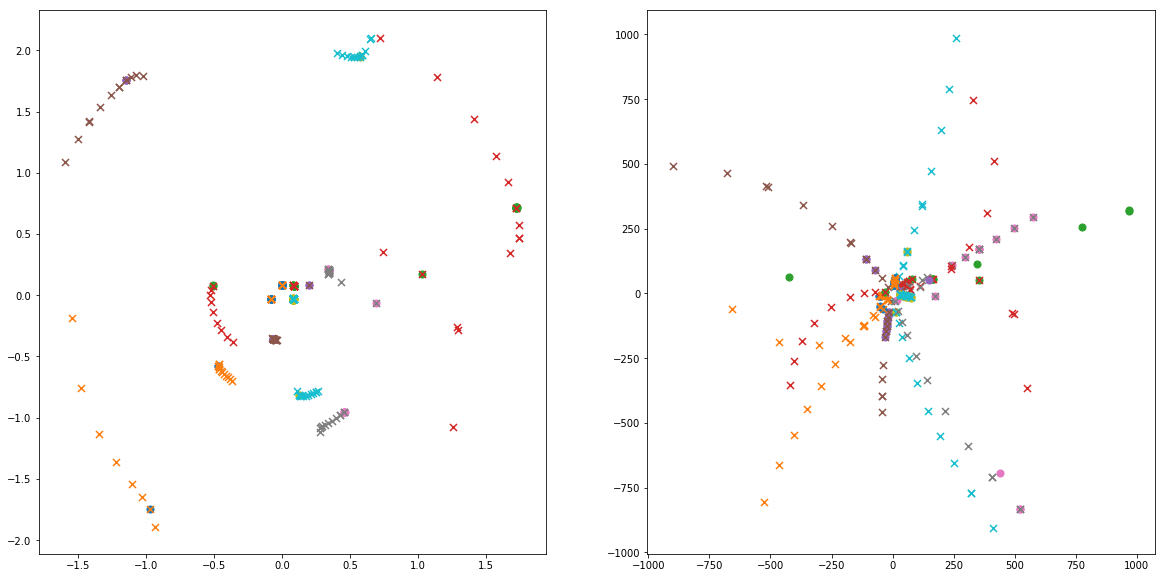

In [391]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(len(hitids)):
    
    difference = []
        
    p_id = truths[truths.hit_id.isin(hitids[i][1])].particle_id.unique()[0]
    hits_in_full = truths[truths.particle_id == p_id].hit_id.count()
    
    common_track = submission[submission.hit_id.isin(hitids[i][1])]['track_id'].value_counts().idxmax()
    hits_found = len(submission[submission.track_id == common_track])
   
    diff = hits_in_full - hits_found
    difference.append(hits_in_full - hits_found)
    missed = [hit_id for hit_id in hitids[i][1] if hit_id not in submission[submission.track_id == common_track].hit_id]
    
    track = hitids[i][0]
    
    t1 = preprocess(truths)[truths.hit_id.isin(submission[submission.track_id == common_track].hit_id)]
    t2 = preprocess(truths)[truths.hit_id.isin(missed)]
    
    ax1.scatter(t1[:,0], t1[:,1], s=50, alpha=1, marker='o')
    ax1.scatter(t2[:,0], t2[:,1], s=50, alpha=1, marker='x')
    
    t3 = truths[truths.hit_id.isin(submission[submission.track_id == common_track].hit_id)]
    t4 = truths[truths.hit_id.isin(missed)]

    ax2.scatter(t3.x, t3.y, s=50, alpha=1, marker='o')
    ax2.scatter(t4.x, t4.y, s=50, alpha=1, marker='x')

plt.show()


In [354]:
common_track = submission[submission.hit_id.isin(hitids[9][1])]['track_id'].value_counts().idxmax()
submission[submission.track_id == common_track]

,event_id,hit_id,track_id
43065,0,43066,22440
43076,0,43077,22440
